In [1]:
import torch

In [2]:
import torchvision

In [3]:
from torchvision import transforms,datasets

In [7]:
train = datasets.MNIST('',train=True,download=True, transform=transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST('',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


In [31]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [32]:
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=False)

# Lecture 3
* defining a feed forward network 

In [14]:
import torch.nn as nn   # classes 
import torch.nn.functional as F

## We define a simple feedforward Nueral Network 

In [17]:
class Net(nn.Module):   ### class Net inherit from nn.Module
    def __init__(self):
        super().__init__()   # if you want to run __init__(self)
        self.fc1 = nn.Linear(784,64)  # 784 = 28*28
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):   # method that defines how data flow through over network
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)
        
        
        
            
net = Net()   
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
X = torch.rand([28,28])
X.shape

torch.Size([28, 28])

In [21]:
X = X.view([-1,28*28])  # -1 shows input is of any size (let say in a case 
# when we have batch)

In [22]:
output = net(X)

In [23]:
output

tensor([[-2.1519, -2.2818, -2.2254, -2.4122, -2.3570, -2.3828, -2.3822, -2.3229,
         -2.2906, -2.2495]], grad_fn=<LogSoftmaxBackward>)

# Lecture # 4 
* Optimize the algorithm for our task of recognizing the digits 

In [36]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of feature-sets and label
        X, y= data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step() # adjust the weight 
    print(loss)


tensor(0.0349, grad_fn=<NllLossBackward>)
tensor(0.0012, grad_fn=<NllLossBackward>)
tensor(0.1848, grad_fn=<NllLossBackward>)


In [45]:
  for idx, i in enumerate(torch.zeros([2,5])):
                          print(i)

tensor([0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0.])


In [46]:
# how good the accuracy is 
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1

print("Accuracy = ",round(correct/total,3)) 
            
    

Accuracy =  0.984


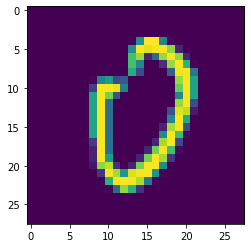

In [56]:
# analyze some data by comparing the input with the predicted output
import matplotlib.pyplot as plt 
plt.imshow(X[1].view(28,28))
plt.show()

In [57]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(0)
